In [1]:
#impoting important packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random as rd 
import seaborn as sns

In [2]:
#Reading data from file 
df=pd.read_csv("netflix_titles.csv",encoding="utf-8")

In [3]:
#exploring data
df.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [4]:
df.shape

(7787, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
#Missing values calculation 
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
#droping description column because it's not important 
df.drop(columns=['description'],inplace=True)

In [8]:
#Transform date added column to date_time type to help us to analyis data more accurate 
df['date_added'] = pd.to_datetime(df['date_added'])


In [9]:
df[["date_added"]]

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01
...,...
7782,2020-10-19
7783,2019-03-02
7784,2020-09-25
7785,2020-10-31


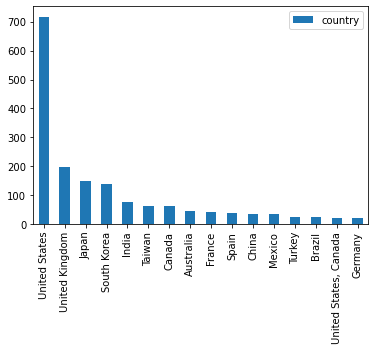

In [10]:
#Trying to fill missing values in director column 
#first we starts to search about most countery that has missing data in director column 
Contries_directors=df.loc[df["director"].isnull(),:].sort_values(by = ['country']).country.value_counts()
Contries_directors=pd.DataFrame(Contries_directors)
Contries_directors.shape
Contries_directors[Contries_directors["country"]>20].plot.bar()

In [11]:
Contries_directors[Contries_directors["country"]>20].sum()

country    1682
dtype: int64

In [12]:
df.country.value_counts()

United States                                 2555
India                                          923
United Kingdom                                 397
Japan                                          226
South Korea                                    183
                                              ... 
Spain, France, Italy                             1
Ireland, Luxembourg, Belgium                     1
United Kingdom, Ireland, United States           1
Spain, Germany, Denmark, United States           1
Switzerland, United Kingdom, United States       1
Name: country, Length: 681, dtype: int64

In [13]:
#After some data exploration we found that it's hard to fill missing values in director columns so we decided to drop it 
df.drop(columns=["director"],inplace=True)

In [14]:
df.isnull().sum()

show_id           0
type              0
title             0
cast            718
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
dtype: int64

In [15]:
#Now we will explore country coulmn and try to fill its missing values 
df.country.value_counts()

United States                                 2555
India                                          923
United Kingdom                                 397
Japan                                          226
South Korea                                    183
                                              ... 
Spain, France, Italy                             1
Ireland, Luxembourg, Belgium                     1
United Kingdom, Ireland, United States           1
Spain, Germany, Denmark, United States           1
Switzerland, United Kingdom, United States       1
Name: country, Length: 681, dtype: int64

In [16]:
df[df['country'].isnull()&df['cast'].isnull()]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in
359,s360,TV Show,Ajaibnya Cinta,NaN,NaN,2017-10-13,2015,TV-PG,1 Season,"International TV Shows, TV Dramas"
390,s391,Movie,"Alias JJ, la celebridad del mal",NaN,NaN,2017-09-01,2017,TV-MA,54 min,"Documentaries, International Movies"
428,s429,TV Show,Alone,NaN,NaN,2020-06-02,2019,TV-14,1 Season,Reality TV
554,s555,Movie,Antoine Griezmann: The Making of a Legend,NaN,NaN,2019-03-21,2019,TV-PG,60 min,"Documentaries, International Movies, Sports Mo..."
680,s681,TV Show,Back with the Ex,NaN,NaN,2019-01-11,2018,TV-MA,1 Season,"International TV Shows, Reality TV, Romantic T..."
...,...,...,...,...,...,...,...,...,...,...
6596,s6597,Movie,The Light of My Eyes,NaN,NaN,2020-06-05,2010,TV-MA,96 min,"Dramas, International Movies, Romantic Movies"
6747,s6748,Movie,The Perfect Day,NaN,NaN,2018-09-01,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
7164,s7165,TV Show,Towies,NaN,NaN,2017-12-27,2016,TV-MA,1 Season,"International TV Shows, Reality TV"
7361,s7362,TV Show,Unsolved Mysteries,NaN,NaN,2020-10-19,2020,TV-MA,2 Seasons,"Crime TV Shows, Docuseries"


In [17]:
#we decided to fill null cells in country columns with united states cause it's the most repeated country "mode"
df["country"].fillna("United States",inplace=True)

In [18]:
df["country"].isnull().sum()

0

In [19]:
#Now we will explore date_added  coulmn and try to fill its missing values 
df.sort_values(["date_added"])

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in
7113,s7114,Movie,To and From New York,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers"
1765,s1766,TV Show,Dinner for Five,NaN,United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows
3248,s3249,Movie,Just Another Love Story,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,TV-MA,104 min,"Dramas, International Movies"
5765,s5766,Movie,Splatter,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-MA,29 min,Horror Movies
3840,s3841,Movie,Mad Ron's Prevues from Hell,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies"
...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,Igor Dmitriev,United States,NaT,2010,TV-Y,2 Seasons,Kids' TV
3492,s3493,TV Show,La Familia P. Luche,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
3946,s3947,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies
5137,s5138,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."


In [20]:
sum(df.date_added.value_counts()<2)

447

In [21]:
df[df["date_added"].isnull()]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
549,s550,TV Show,Anthony Bourdain: Parts Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries
2263,s2264,TV Show,Frasier,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
2288,s2289,TV Show,Friends,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
2555,s2556,TV Show,Gunslinger Girl,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
3374,s3375,TV Show,Kikoriki,Igor Dmitriev,United States,NaT,2010,TV-Y,2 Seasons,Kids' TV
3492,s3493,TV Show,La Familia P. Luche,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
3946,s3947,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies
5137,s5138,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6065,s6066,TV Show,The Adventures of Figaro Pho,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [22]:
df.loc[df['release_year']<2008,'date_added'].value_counts()

2020-01-01    72
2019-11-01    52
2019-12-31    49
2019-10-01    37
2018-03-01    26
              ..
2019-01-08     1
2019-04-16     1
2020-10-08     1
2019-10-19     1
2019-06-08     1
Name: date_added, Length: 239, dtype: int64

In [23]:
def Year_added (df):
    years=[]
    for i in df:
         years.append(str(i).split("-")[0])
    return years

In [24]:
Year_added (df["date_added"])


['2020',
 '2016',
 '2018',
 '2017',
 '2020',
 '2017',
 '2020',
 '2019',
 '2019',
 '2017',
 '2017',
 '2018',
 '2019',
 '2019',
 '2020',
 '2019',
 '2019',
 '2018',
 '2019',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2020',
 '2016',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2017',
 '2019',
 '2016',
 '2019',
 '2019',
 '2019',
 '2019',
 '2017',
 '2018',
 '2017',
 '2020',
 '2018',
 '2017',
 '2017',
 '2017',
 '2019',
 '2017',
 '2019',
 '2020',
 '2018',
 '2020',
 '2017',
 '2019',
 '2018',
 '2021',
 '2019',
 '2016',
 '2019',
 '2017',
 '2016',
 '2020',
 '2019',
 '2019',
 '2016',
 '2017',
 '2019',
 '2018',
 '2019',
 '2019',
 '2021',
 '2020',
 '2017',
 '2020',
 '2019',
 '2020',
 '2018',
 '2018',
 '2017',
 '2017',
 '2018',
 '2019',
 '2019',
 '2020',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2017',
 '2018',
 '2018',
 '2020',
 '2017',
 '2020',
 '2019',
 '2017',
 '2019',
 '2019',
 '2019',
 '2016',
 '2019',
 '2021',
 '2019',
 '2020',
 '2020',
 '2019',
 '2020',
 '2018',
 

In [25]:
df["years"]=Year_added (df["date_added"])

In [26]:
df.loc[df['release_year']<2008,'years'].value_counts()

2019    301
2020    234
2018    181
2017    101
2016     40
2021     31
2011     12
2014      4
2015      4
2008      2
NaT       2
2013      1
2009      1
2010      1
Name: years, dtype: int64

In [27]:
df.loc[df['release_year']>2008,'years'].value_counts()

2019    1810
2020    1750
2018    1473
2017    1113
2016     391
2015      84
2021      83
2014      21
2013      10
NaT        7
2012       3
2011       1
2009       1
Name: years, dtype: int64

We figure out that most of added process done between 2017 and 2020 so if we fill null cells in date added column with random date between 1-1-2017 to 30-12-2020 we will be more precise 

In [28]:
years=[2017,2018,2019,2020]
days=[]
for i in range(1,31):
    days.append(i)
months=[]
for i in range(1,13):
    months.append(i)
print(years,months,days)
date="{}-{}-{}".format(rd.choice(years),rd.choice(months),rd.choice(days))

[2017, 2018, 2019, 2020] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [29]:
df["date_added"].fillna(pd.to_datetime(date),inplace=True)

In [30]:
df["date_added"].isnull().sum()

0

In [31]:
#Now we will explore rating columns to fill missing values 
df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [32]:
df[df["rating"].isnull()]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,years
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,"Oprah Winfrey, Ava DuVernay",United States,2017-01-26,2017,NaN,37 min,Movies,2017
2359,s2360,TV Show,Gargantia on the Verdurous Planet,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows",2016
3660,s3661,TV Show,Little Lunch,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies",2018
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,2017
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,2016
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,2016
4323,s4324,Movie,My Honor Was Loyalty,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,2017


In [33]:
#we notice that the mode is Tv_Ma so we will fill missing value with this value 
df["rating"].fillna("TV-MA",inplace=True)

In [34]:
df.drop(columns="cast",inplace=True)

#### What is more in production movies or Tv serires ? 

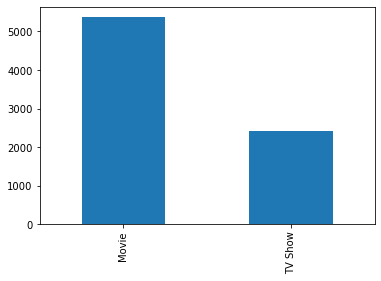

In [35]:
df["type"].value_counts().plot.bar()

#### The answer is :
Movies are more than Tv serires in production 

### Waht is tn most common genre in Netflix ? 

In [36]:
sum(df["listed_in"].value_counts()>1)
### trying to find number of unique values in listed in column 

349

In [37]:
# Trying to extract every  genre in listed in column 
genre=[]
for i in df["listed_in"]:
    l=i.split(",")
    for o in l:
        genre.append(o)
#Tring to get unique genres
genre2=(list(set(genre)))
#another method 
genre1=[]
for i in genre:
    if i not in genre1:
        genre1.append(i)
        
    

In [38]:
#We add every genre to dictionary to be able to iter them in list and add +1 if they appears in each cell in listed in 
#column
dict1={}
for i in genre2:
    dict1[i]=0
dict1

{'British TV Shows': 0,
 ' Reality TV': 0,
 'Crime TV Shows': 0,
 'Stand-Up Comedy & Talk Shows': 0,
 'Anime Features': 0,
 " Kids' TV": 0,
 'Cult Movies': 0,
 'Children & Family Movies': 0,
 'Reality TV': 0,
 'Sci-Fi & Fantasy': 0,
 ' Documentaries': 0,
 'International TV Shows': 0,
 ' TV Horror': 0,
 ' Sci-Fi & Fantasy': 0,
 ' Dramas': 0,
 'Movies': 0,
 ' Comedies': 0,
 'Romantic Movies': 0,
 'Spanish-Language TV Shows': 0,
 'TV Sci-Fi & Fantasy': 0,
 ' TV Comedies': 0,
 ' Stand-Up Comedy': 0,
 'Romantic TV Shows': 0,
 ' International Movies': 0,
 ' Docuseries': 0,
 ' Horror Movies': 0,
 ' Independent Movies': 0,
 ' Crime TV Shows': 0,
 'Horror Movies': 0,
 ' TV Mysteries': 0,
 'TV Shows': 0,
 'Docuseries': 0,
 'LGBTQ Movies': 0,
 'TV Comedies': 0,
 "Kids' TV": 0,
 'TV Action & Adventure': 0,
 ' TV Action & Adventure': 0,
 'Documentaries': 0,
 ' Korean TV Shows': 0,
 'Classic & Cult TV': 0,
 ' LGBTQ Movies': 0,
 ' Spanish-Language TV Shows': 0,
 ' Romantic TV Shows': 0,
 ' Classic Mo

In [39]:
#Loop on listed in column and add +1 if any genre in the dict1 appears in each cell in listed in column
for i in df["listed_in"]:
    l=i.split(",")
    for j in l :
        if j in genre2:
            dict1[j]+=1


In [40]:
dict1

{'British TV Shows': 232,
 ' Reality TV': 120,
 'Crime TV Shows': 369,
 'Stand-Up Comedy & Talk Shows': 33,
 'Anime Features': 19,
 " Kids' TV": 55,
 'Cult Movies': 12,
 'Children & Family Movies': 502,
 'Reality TV': 102,
 'Sci-Fi & Fantasy': 11,
 ' Documentaries': 35,
 'International TV Shows': 690,
 ' TV Horror': 59,
 ' Sci-Fi & Fantasy': 207,
 ' Dramas': 722,
 'Movies': 56,
 ' Comedies': 397,
 'Romantic Movies': 3,
 'Spanish-Language TV Shows': 2,
 'TV Sci-Fi & Fantasy': 1,
 ' TV Comedies': 415,
 ' Stand-Up Comedy': 8,
 'Romantic TV Shows': 28,
 ' International Movies': 2323,
 ' Docuseries': 159,
 ' Horror Movies': 68,
 ' Independent Movies': 653,
 ' Crime TV Shows': 58,
 'Horror Movies': 244,
 ' TV Mysteries': 90,
 'TV Shows': 12,
 'Docuseries': 194,
 'LGBTQ Movies': 1,
 'TV Comedies': 110,
 "Kids' TV": 359,
 'TV Action & Adventure': 37,
 ' TV Action & Adventure': 113,
 'Documentaries': 751,
 ' Korean TV Shows': 150,
 'Classic & Cult TV': 21,
 ' LGBTQ Movies': 89,
 ' Spanish-Langu

In [41]:
set(dict1.keys())

{' Anime Features',
 ' Children & Family Movies',
 ' Classic & Cult TV',
 ' Classic Movies',
 ' Comedies',
 ' Crime TV Shows',
 ' Cult Movies',
 ' Documentaries',
 ' Docuseries',
 ' Dramas',
 ' Faith & Spirituality',
 ' Horror Movies',
 ' Independent Movies',
 ' International Movies',
 ' International TV Shows',
 " Kids' TV",
 ' Korean TV Shows',
 ' LGBTQ Movies',
 ' Music & Musicals',
 ' Reality TV',
 ' Romantic Movies',
 ' Romantic TV Shows',
 ' Sci-Fi & Fantasy',
 ' Science & Nature TV',
 ' Spanish-Language TV Shows',
 ' Sports Movies',
 ' Stand-Up Comedy',
 ' Stand-Up Comedy & Talk Shows',
 ' TV Action & Adventure',
 ' TV Comedies',
 ' TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 ' TV Sci-Fi & Fantasy',
 ' TV Thrillers',
 ' Teen TV Shows',
 ' Thrillers',
 'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',

In [42]:
#After this step we found that data wasn't clean as there was duplicated gneres with different indentation 
#like " Dramas" and "Dramas" same genre bit the difference is an additional space in the first one 

In [43]:
#we define a function that transform the dictionary to list of listes to make it easy to maipulate strings
def transo_to_list (h):
    h=h.items()
    j=list(h)
    c=0
    for i in j:
        j[c]=list(i)
        c=c+1
    return j

In [44]:
genre_to_list=transo_to_list (dict1)

In [45]:
genre_to_list

[['British TV Shows', 232],
 [' Reality TV', 120],
 ['Crime TV Shows', 369],
 ['Stand-Up Comedy & Talk Shows', 33],
 ['Anime Features', 19],
 [" Kids' TV", 55],
 ['Cult Movies', 12],
 ['Children & Family Movies', 502],
 ['Reality TV', 102],
 ['Sci-Fi & Fantasy', 11],
 [' Documentaries', 35],
 ['International TV Shows', 690],
 [' TV Horror', 59],
 [' Sci-Fi & Fantasy', 207],
 [' Dramas', 722],
 ['Movies', 56],
 [' Comedies', 397],
 ['Romantic Movies', 3],
 ['Spanish-Language TV Shows', 2],
 ['TV Sci-Fi & Fantasy', 1],
 [' TV Comedies', 415],
 [' Stand-Up Comedy', 8],
 ['Romantic TV Shows', 28],
 [' International Movies', 2323],
 [' Docuseries', 159],
 [' Horror Movies', 68],
 [' Independent Movies', 653],
 [' Crime TV Shows', 58],
 ['Horror Movies', 244],
 [' TV Mysteries', 90],
 ['TV Shows', 12],
 ['Docuseries', 194],
 ['LGBTQ Movies', 1],
 ['TV Comedies', 110],
 ["Kids' TV", 359],
 ['TV Action & Adventure', 37],
 [' TV Action & Adventure', 113],
 ['Documentaries', 751],
 [' Korean TV 

In [46]:
#we clean the repeated genere from additional space 
for i in genre_to_list:
    i[0]=i[0].lstrip()
print(genre_to_list)

[['British TV Shows', 232], ['Reality TV', 120], ['Crime TV Shows', 369], ['Stand-Up Comedy & Talk Shows', 33], ['Anime Features', 19], ["Kids' TV", 55], ['Cult Movies', 12], ['Children & Family Movies', 502], ['Reality TV', 102], ['Sci-Fi & Fantasy', 11], ['Documentaries', 35], ['International TV Shows', 690], ['TV Horror', 59], ['Sci-Fi & Fantasy', 207], ['Dramas', 722], ['Movies', 56], ['Comedies', 397], ['Romantic Movies', 3], ['Spanish-Language TV Shows', 2], ['TV Sci-Fi & Fantasy', 1], ['TV Comedies', 415], ['Stand-Up Comedy', 8], ['Romantic TV Shows', 28], ['International Movies', 2323], ['Docuseries', 159], ['Horror Movies', 68], ['Independent Movies', 653], ['Crime TV Shows', 58], ['Horror Movies', 244], ['TV Mysteries', 90], ['TV Shows', 12], ['Docuseries', 194], ['LGBTQ Movies', 1], ['TV Comedies', 110], ["Kids' TV", 359], ['TV Action & Adventure', 37], ['TV Action & Adventure', 113], ['Documentaries', 751], ['Korean TV Shows', 150], ['Classic & Cult TV', 21], ['LGBTQ Movies

In [47]:
#We have to add value of duplictes to each other but unfortunatly duplicates appears again but we could add the whole genre value in one of the two douplictes 
genre2=[]
for i in genre_to_list:
    for j in genre2:
        if i[0]==j[0]:
            j[1]+=i[1] 
    genre2.append(i)
genre2

[['British TV Shows', 232],
 ['Reality TV', 222],
 ['Crime TV Shows', 427],
 ['Stand-Up Comedy & Talk Shows', 52],
 ['Anime Features', 57],
 ["Kids' TV", 414],
 ['Cult Movies', 59],
 ['Children & Family Movies', 532],
 ['Reality TV', 102],
 ['Sci-Fi & Fantasy', 218],
 ['Documentaries', 786],
 ['International TV Shows', 1199],
 ['TV Horror', 69],
 ['Sci-Fi & Fantasy', 207],
 ['Dramas', 2106],
 ['Movies', 56],
 ['Comedies', 1471],
 ['Romantic Movies', 531],
 ['Spanish-Language TV Shows', 147],
 ['TV Sci-Fi & Fantasy', 76],
 ['TV Comedies', 525],
 ['Stand-Up Comedy', 329],
 ['Romantic TV Shows', 333],
 ['International Movies', 2437],
 ['Docuseries', 353],
 ['Horror Movies', 312],
 ['Independent Movies', 673],
 ['Crime TV Shows', 58],
 ['Horror Movies', 244],
 ['TV Mysteries', 90],
 ['TV Shows', 12],
 ['Docuseries', 194],
 ['LGBTQ Movies', 90],
 ['TV Comedies', 110],
 ["Kids' TV", 359],
 ['TV Action & Adventure', 150],
 ['TV Action & Adventure', 113],
 ['Documentaries', 751],
 ['Korean TV 

In [48]:
#making data frame contains genre and its count from our dictionary 
genre_df= pd.DataFrame(genre2, columns = ['genre', 'Count'])
genre_df.shape

(73, 2)

In [49]:
#Deleting duplicates depending on max number of them 
genre_df=pd.DataFrame(genre_df.groupby("genre").max()['Count'])
genre_df.shape
genre_df


,Count
genre,
Action & Adventure,721
Anime Features,57
Anime Series,148
British TV Shows,232
Children & Family Movies,532
Classic & Cult TV,27
Classic Movies,103
Comedies,1471
Crime TV Shows,427


In [50]:
genre_df.loc["Dramas",'Count']

2106

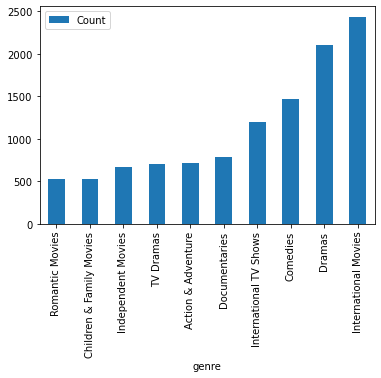

In [51]:
genre_df.sort_values("Count").tail(10).plot.bar()

From chart we found that Drama is the most common genre in movies and also Tv series 

### Years of activity 

In [52]:
df["years"]=Year_added (df["date_added"])
df['years'].value_counts()

2019    2153
2020    2019
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: years, dtype: int64

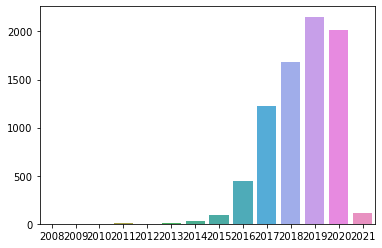

In [53]:
sns.barplot(x=df['years'].value_counts().index,y=df['years'].value_counts().values)

### Bar chart for top 10 countries in industry 

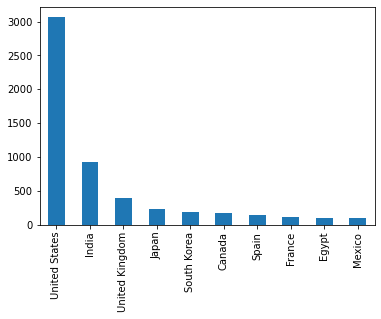

In [54]:
df["country"].value_counts().head(10).plot.bar()